#                                       Predicting Offer Acceptance in Credit Card Marketing Campaigns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('creditcardmarketing-bbm.csv')

In [4]:
df=pd.DataFrame(data)

# Preprocessing

In [6]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [8]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [9]:
df.shape

(18000, 17)

In [10]:
df.columns

Index(['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type',
       'Income Level', '# Bank Accounts Open', 'Overdraft Protection',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [11]:
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [12]:
df=df.fillna(0)

In [13]:
df.isnull().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [14]:
df.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [15]:
df.duplicated().sum()

0

In [16]:
df=df.drop(columns=['Customer Number','Overdraft Protection'])
df

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


# Label Encoding

In [18]:
cat_cols = ['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 
             'Credit Rating', 'Own Your Home']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,0,0,0,1,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0
1,0,0,0,2,1,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0
2,0,0,1,0,2,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0
3,0,0,0,2,2,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0
4,0,0,0,2,1,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  int32  
 1   Reward                18000 non-null  int32  
 2   Mailer Type           18000 non-null  int32  
 3   Income Level          18000 non-null  int32  
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Credit Rating         18000 non-null  int32  
 6   # Credit Cards Held   18000 non-null  int64  
 7   # Homes Owned         18000 non-null  int64  
 8   Household Size        18000 non-null  int64  
 9   Own Your Home         18000 non-null  int32  
 10  Average Balance       18000 non-null  float64
 11  Q1 Balance            18000 non-null  float64
 12  Q2 Balance            18000 non-null  float64
 13  Q3 Balance            18000 non-null  float64
 14  Q4 Balance            18000 non-null  float64
dtypes: float64(5), int3

# Handling Inbalanced Data

In [22]:
target_value_count=df['Offer Accepted'].value_counts()

In [23]:
target_value_count

Offer Accepted
0    16977
1     1023
Name: count, dtype: int64

In [24]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Offer Accepted')], df['Offer Accepted'])

In [25]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 18000
Resampled balanced dataset shape 33954


In [26]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Offer Accepted'))

In [27]:
balanced_df['Offer Accepted'] = y_smote

In [28]:
balanced_df.shape

(33954, 15)

In [29]:
target_value_count=balanced_df['Offer Accepted'].value_counts()
target_value_count

Offer Accepted
0    16977
1    16977
Name: count, dtype: int64

In [30]:
balanced_df.head()

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0,0
1,0,0,2,1,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0,0
2,0,1,0,2,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0,0
3,0,0,2,2,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0,0
4,0,0,2,1,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0,0


In [31]:
balanced_df.duplicated().sum()

4

In [32]:
balanced_df.drop_duplicates(inplace = True)

In [33]:
balanced_df.duplicated().sum()

0

In [34]:
balanced_df.isnull().sum()

Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
Offer Accepted          0
dtype: int64

In [35]:
df1=balanced_df.copy()
df1

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1,0,2,1,4,0,1160.750000,1669.000000,877.000000,1095.000000,1002.000000,0
1,0,0,2,1,2,2,2,5,1,147.250000,39.000000,106.000000,78.000000,366.000000,0
2,0,1,0,2,2,2,1,2,1,276.500000,367.000000,352.000000,145.000000,242.000000,0
3,0,0,2,2,0,1,1,4,0,1219.000000,1578.000000,1760.000000,1119.000000,419.000000,0
4,0,0,2,1,2,2,1,6,1,1211.000000,2140.000000,1357.000000,982.000000,365.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,0,1,0,1,0,2,1,4,0,1009.044745,1524.311985,1146.664941,953.964204,411.237849,1
33950,0,1,0,1,1,3,1,5,1,758.970759,755.841281,831.397391,654.517913,794.126452,1
33951,0,1,0,2,1,1,1,3,0,1250.340088,1222.815814,579.612186,1792.227731,1406.704622,1
33952,0,0,0,1,0,1,1,4,0,871.034688,800.413611,982.312848,805.520973,895.891318,1


In [36]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reward,33950.0,0.796024,0.792882,0.0,0.000000,1.000000,1.000000,2.00
Mailer Type,33950.0,0.506775,0.499961,0.0,0.000000,1.000000,1.000000,1.00
Income Level,33950.0,1.128984,0.767314,0.0,1.000000,1.000000,2.000000,2.00
# Bank Accounts Open,33950.0,1.168984,0.398661,1.0,1.000000,1.000000,1.000000,3.00
Credit Rating,33950.0,0.940236,0.684570,0.0,0.000000,1.000000,1.000000,2.00
# Credit Cards Held,33950.0,1.745538,0.737972,1.0,1.000000,2.000000,2.000000,4.00
# Homes Owned,33950.0,1.130722,0.352896,1.0,1.000000,1.000000,1.000000,3.00
Household Size,33950.0,3.297349,1.046494,1.0,3.000000,3.000000,4.000000,9.00
Own Your Home,33950.0,0.538881,0.498493,0.0,0.000000,1.000000,1.000000,1.00
Average Balance,33950.0,938.693664,349.231091,0.0,793.750000,1008.651526,1152.837400,3366.25


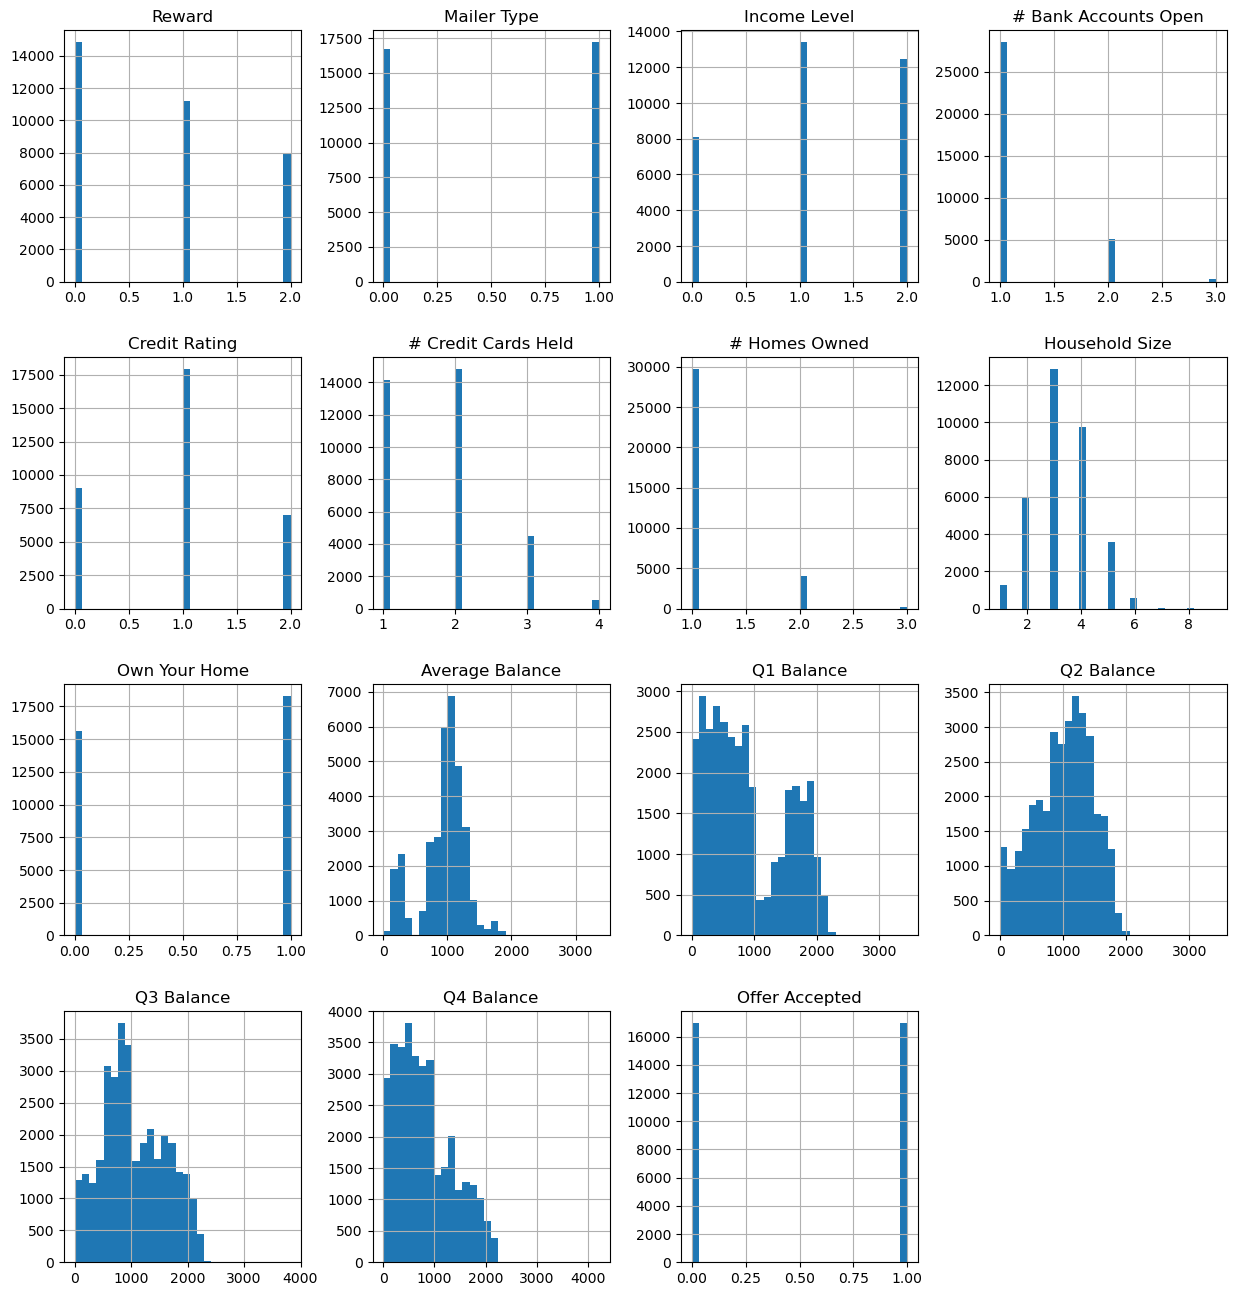

In [37]:
df1.hist(figsize=(15, 16), bins=30)
plt.show()

In [38]:
numerical_features = df1.select_dtypes(include = 'number')
print(numerical_features)

       Reward  Mailer Type  Income Level  # Bank Accounts Open  Credit Rating  \
0           0            0             0                     1              0   
1           0            0             2                     1              2   
2           0            1             0                     2              2   
3           0            0             2                     2              0   
4           0            0             2                     1              2   
...       ...          ...           ...                   ...            ...   
33949       0            1             0                     1              0   
33950       0            1             0                     1              1   
33951       0            1             0                     2              1   
33952       0            0             0                     1              0   
33953       0            0             1                     1              1   

       # Credit Cards Held 

# Handling Outliers

Text(0.5, 1.0, 'Box Plot of Credit Card Usage')

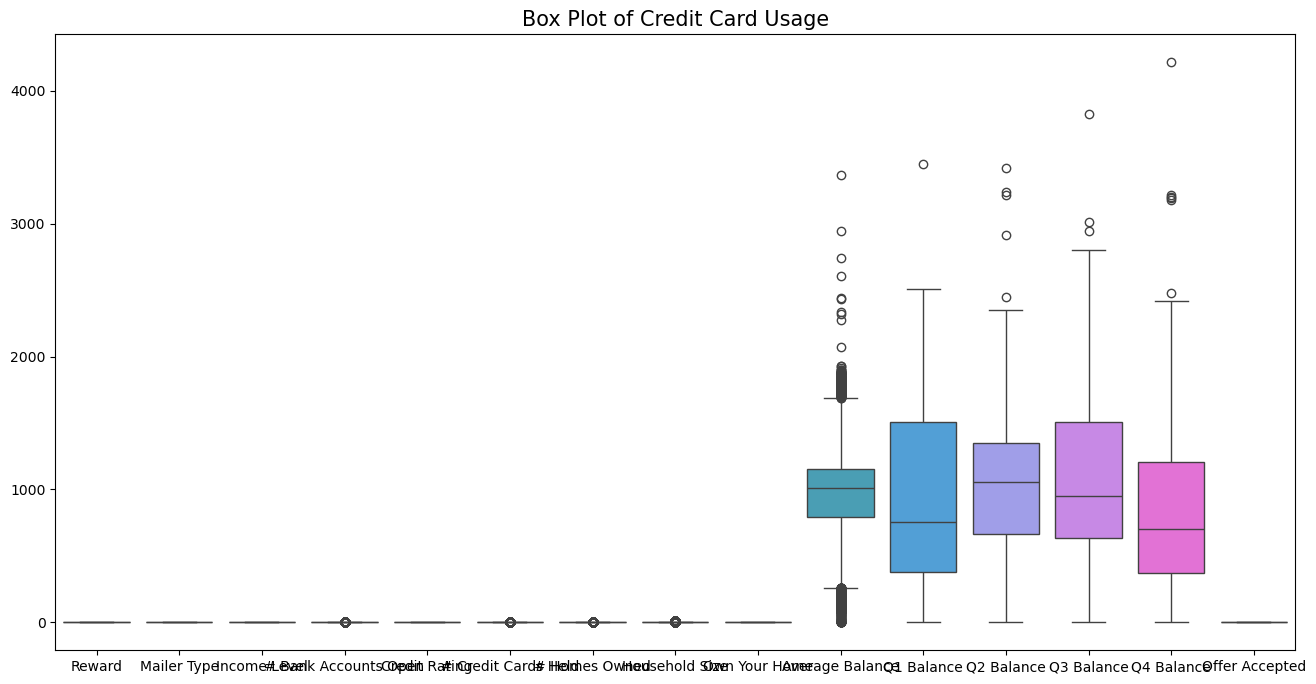

In [40]:
plt.figure(figsize = (16,8))
sns.boxplot(df1[numerical_features.columns])
plt.title("Box Plot of Credit Card Usage", fontsize=15)

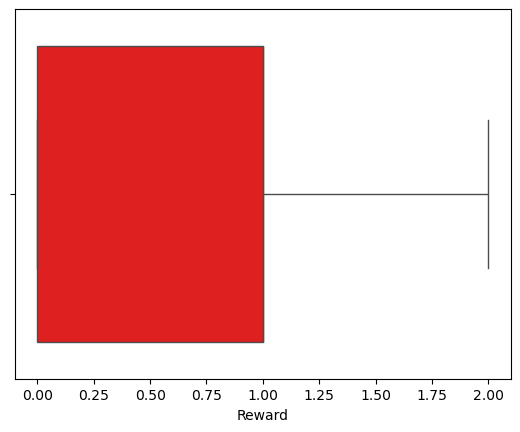

<Figure size 500x500 with 0 Axes>

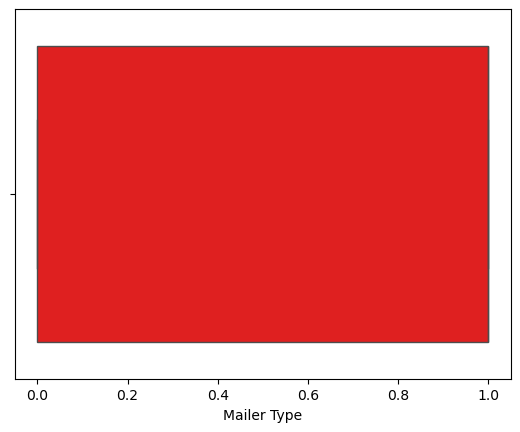

<Figure size 500x500 with 0 Axes>

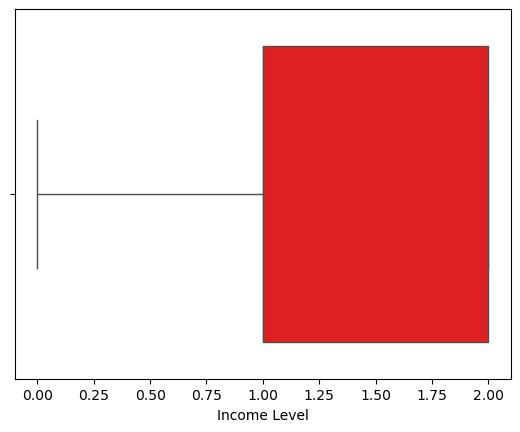

<Figure size 500x500 with 0 Axes>

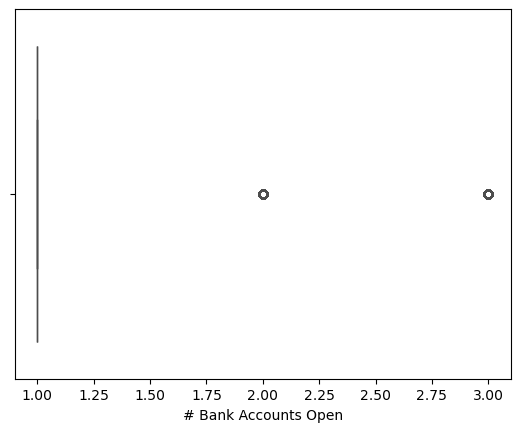

<Figure size 500x500 with 0 Axes>

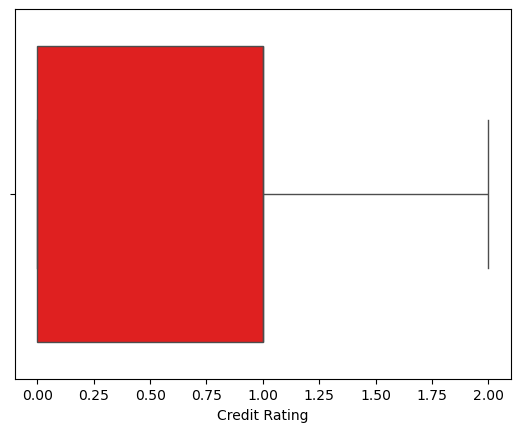

<Figure size 500x500 with 0 Axes>

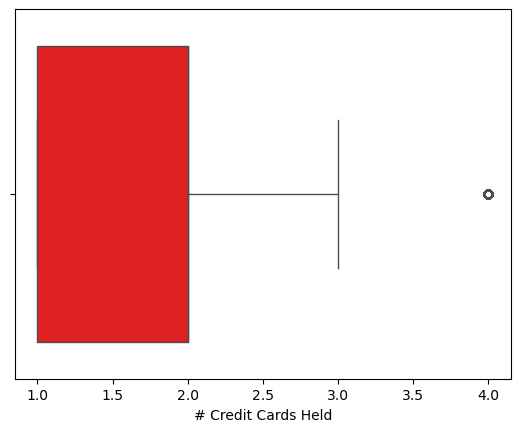

<Figure size 500x500 with 0 Axes>

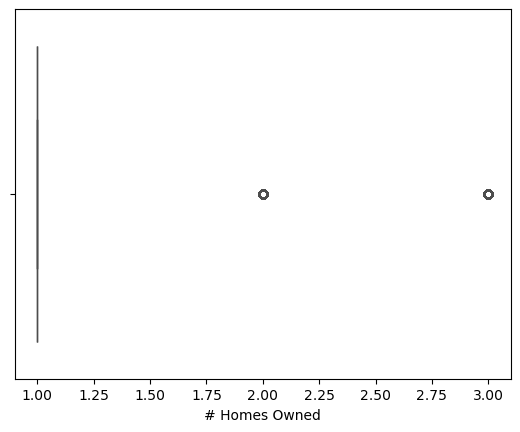

<Figure size 500x500 with 0 Axes>

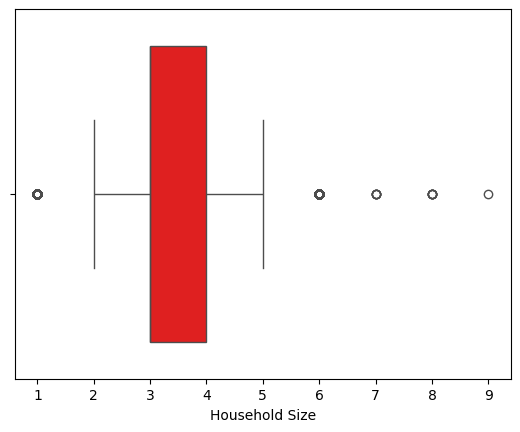

<Figure size 500x500 with 0 Axes>

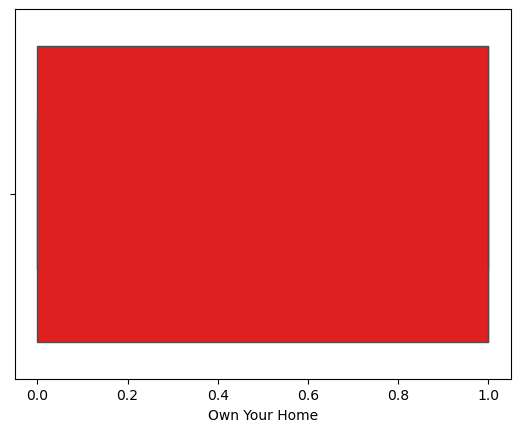

<Figure size 500x500 with 0 Axes>

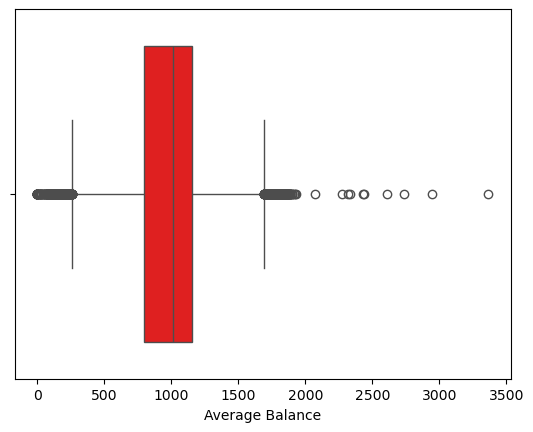

<Figure size 500x500 with 0 Axes>

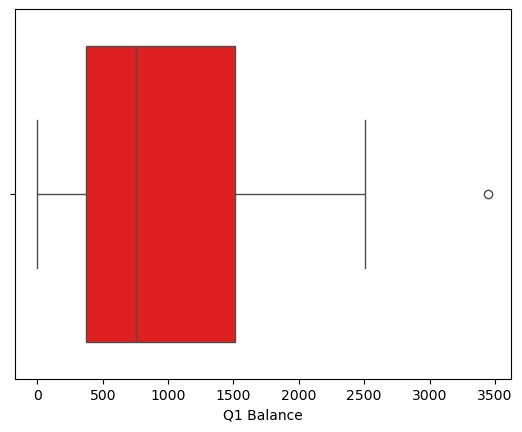

<Figure size 500x500 with 0 Axes>

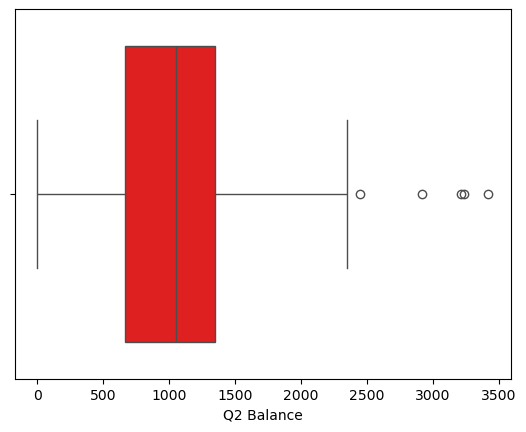

<Figure size 500x500 with 0 Axes>

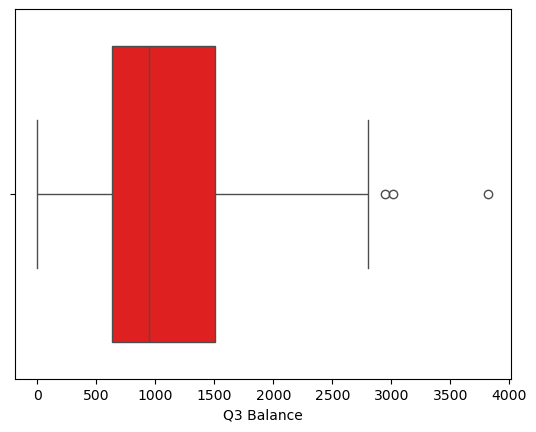

<Figure size 500x500 with 0 Axes>

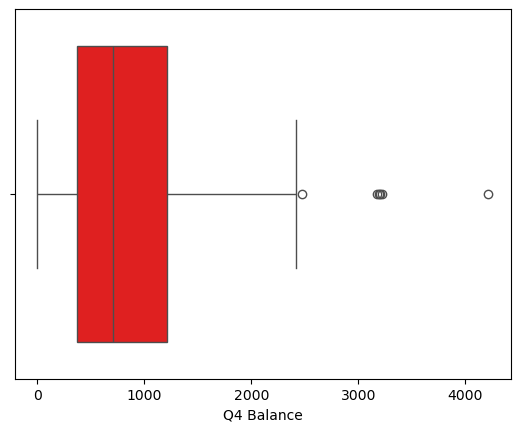

<Figure size 500x500 with 0 Axes>

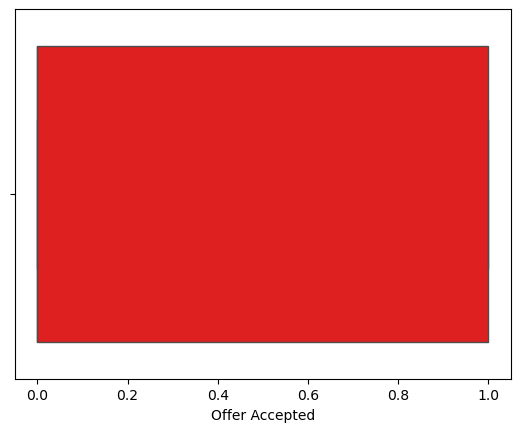

<Figure size 500x500 with 0 Axes>

In [41]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df1,color ='red')
    plt.figure(figsize=(5, 5))
    plt.show()

In [42]:
def remove_outliers(df):
    for col in df1.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)

        IQR =Q3-Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5* IQR)

        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)
    return df

In [43]:
df2 = remove_outliers(df1)

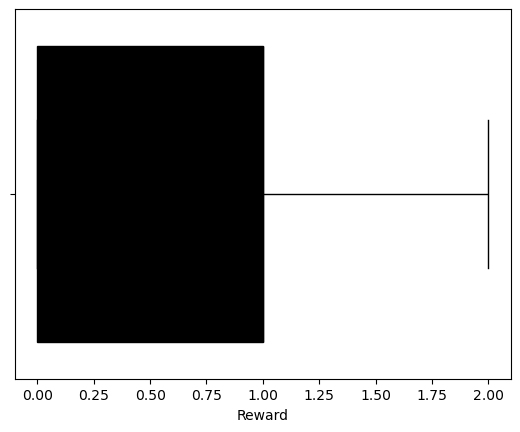

<Figure size 600x600 with 0 Axes>

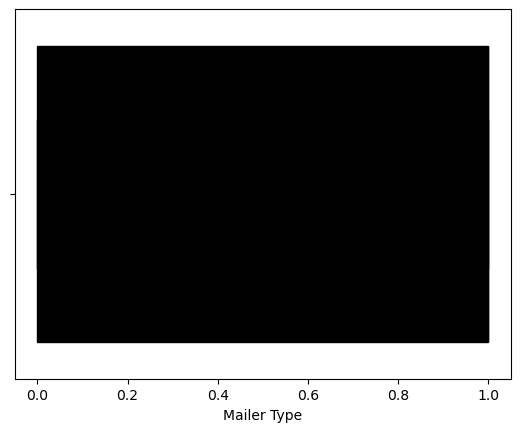

<Figure size 600x600 with 0 Axes>

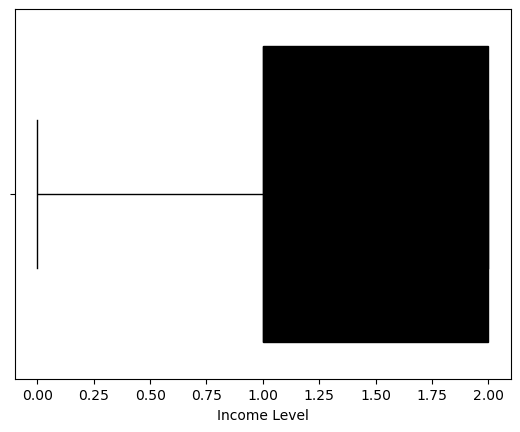

<Figure size 600x600 with 0 Axes>

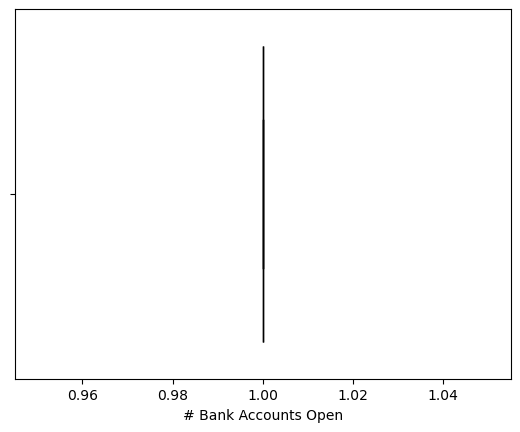

<Figure size 600x600 with 0 Axes>

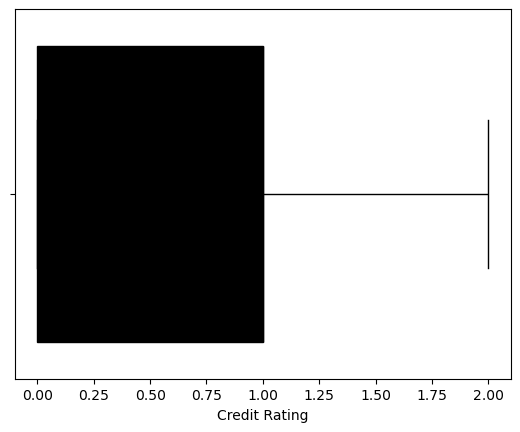

<Figure size 600x600 with 0 Axes>

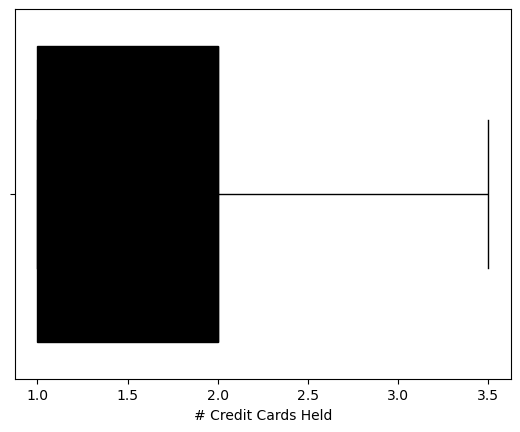

<Figure size 600x600 with 0 Axes>

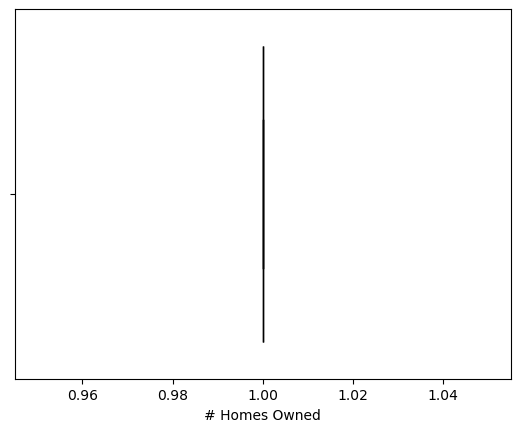

<Figure size 600x600 with 0 Axes>

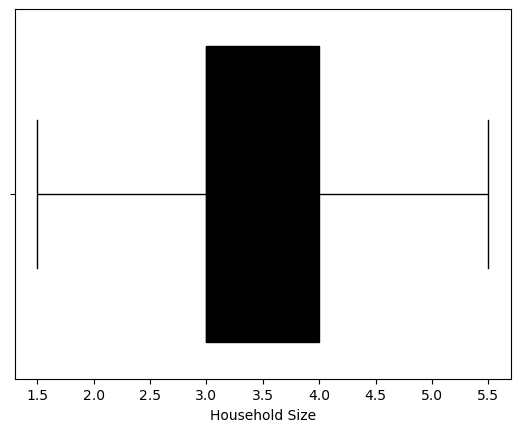

<Figure size 600x600 with 0 Axes>

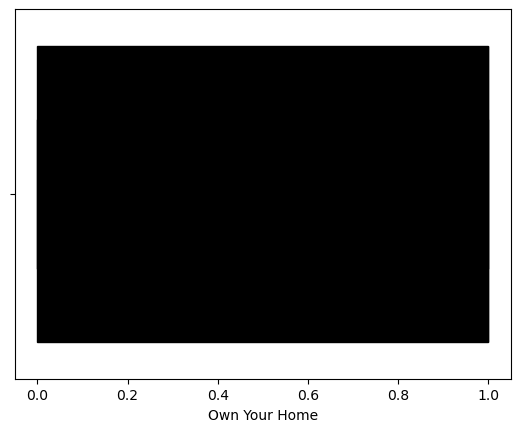

<Figure size 600x600 with 0 Axes>

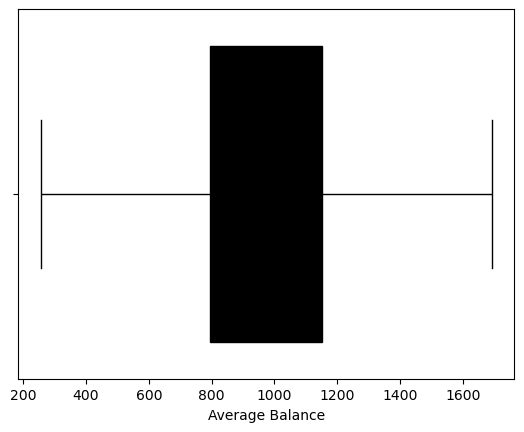

<Figure size 600x600 with 0 Axes>

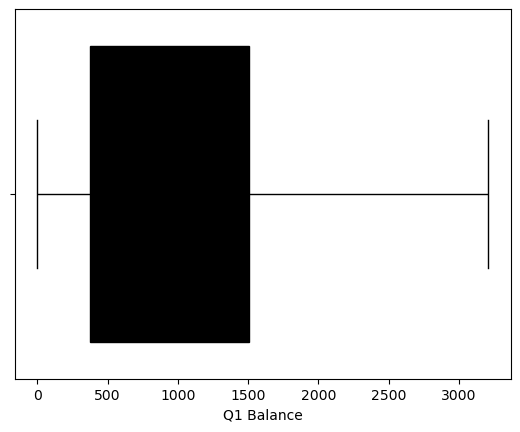

<Figure size 600x600 with 0 Axes>

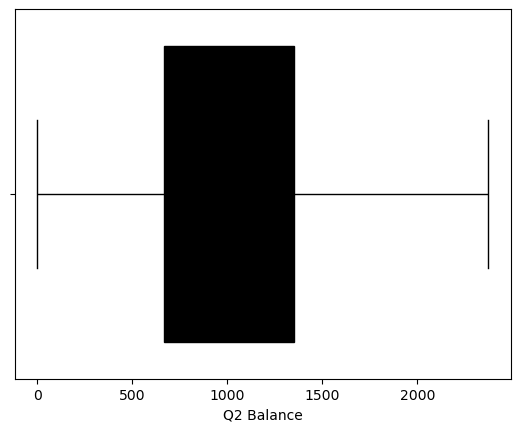

<Figure size 600x600 with 0 Axes>

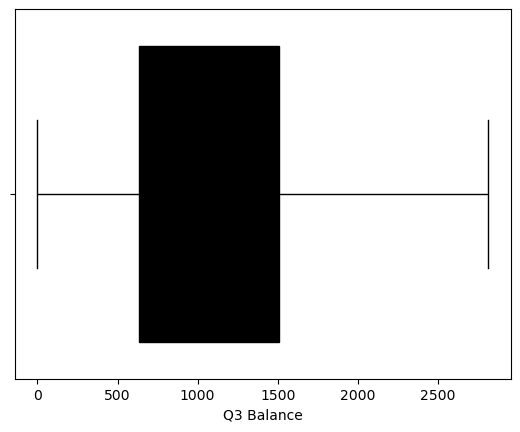

<Figure size 600x600 with 0 Axes>

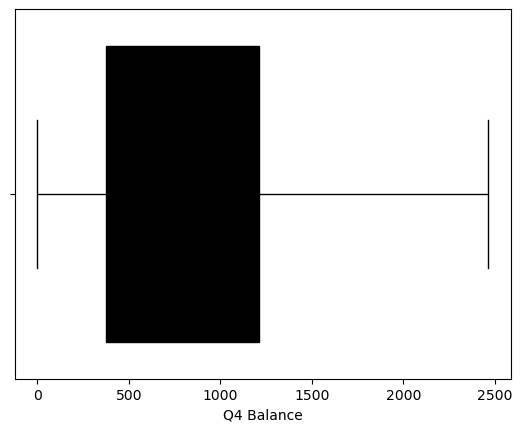

<Figure size 600x600 with 0 Axes>

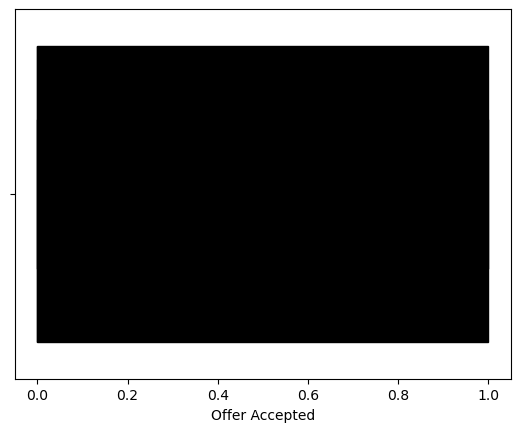

<Figure size 600x600 with 0 Axes>

In [44]:
for i in numerical_features.columns:
    sns.boxplot(x=i,data=df2,color ='black')
    plt.figure(figsize=(6, 6))
    plt.show()

# Handling Skewness

In [46]:
df3 = df2[numerical_features.columns]
df3

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,0,0,0,1.0,0,2.0,1.0,4.0,0,1160.750000,1669.000000,877.000000,1095.000000,1002.000000,0
1,0,0,2,1.0,2,2.0,1.0,5.0,1,255.118900,39.000000,106.000000,78.000000,366.000000,0
2,0,1,0,1.0,2,2.0,1.0,2.0,1,276.500000,367.000000,352.000000,145.000000,242.000000,0
3,0,0,2,1.0,0,1.0,1.0,4.0,0,1219.000000,1578.000000,1760.000000,1119.000000,419.000000,0
4,0,0,2,1.0,2,2.0,1.0,5.5,1,1211.000000,2140.000000,1357.000000,982.000000,365.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,0,1,0,1.0,0,2.0,1.0,4.0,0,1009.044745,1524.311985,1146.664941,953.964204,411.237849,1
33950,0,1,0,1.0,1,3.0,1.0,5.0,1,758.970759,755.841281,831.397391,654.517913,794.126452,1
33951,0,1,0,1.0,1,1.0,1.0,3.0,0,1250.340088,1222.815814,579.612186,1792.227731,1406.704622,1
33952,0,0,0,1.0,0,1.0,1.0,4.0,0,871.034688,800.413611,982.312848,805.520973,895.891318,1


In [47]:
df3.skew()

Reward                  0.379598
Mailer Type            -0.027102
Income Level           -0.223542
# Bank Accounts Open    0.000000
Credit Rating           0.076281
# Credit Cards Held     0.512102
# Homes Owned           0.000000
Household Size          0.164962
Own Your Home          -0.156002
Average Balance        -0.663481
Q1 Balance              0.440597
Q2 Balance             -0.272971
Q3 Balance              0.226361
Q4 Balance              0.621930
Offer Accepted          0.000236
dtype: float64

In [48]:
pt = PowerTransformer(method='yeo-johnson')

In [49]:
numerical_features = df3.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['Reward', 'Mailer Type', 'Income Level', '# Bank Accounts Open',
       'Credit Rating', '# Credit Cards Held', '# Homes Owned',
       'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance', 'Q4 Balance', 'Offer Accepted'],
      dtype='object')

In [50]:
df3[numerical_features] = pt.fit_transform(df3[numerical_features])
df3[numerical_features]

,Reward,Mailer Type,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Offer Accepted
0,-1.078558,-1.013642,-1.462395,0.0,-1.422234,0.537014,0.0,0.725277,-1.081035,0.640407,1.167273,-0.273137,0.165080,0.507397,-0.999882
1,-1.078558,-1.013642,1.140906,0.0,1.480319,0.537014,0.0,1.631282,0.925040,-1.855160,-1.973227,-1.973281,-2.079615,-0.706873,-0.999882
2,-1.078558,0.986541,-1.462395,0.0,1.480319,0.537014,0.0,-1.367064,0.925040,-1.817121,-0.747175,-1.425879,-1.850952,-1.061203,-0.999882
3,-1.078558,-1.013642,1.140906,0.0,-1.422234,-1.112234,0.0,0.725277,-1.081035,0.848749,1.070320,1.645789,0.205684,-0.575250,-0.999882
4,-1.078558,-1.013642,1.140906,0.0,1.480319,0.537014,0.0,2.059563,0.925040,0.819854,1.628337,0.772130,-0.029880,-0.709450,-0.999882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33949,-1.078558,0.986541,-1.462395,0.0,-1.422234,0.537014,0.0,0.725277,-1.081035,0.120776,1.011690,0.314829,-0.079286,-0.593953,1.000118
33950,-1.078558,0.986541,-1.462395,0.0,0.138348,1.521056,0.0,1.631282,0.925040,-0.657295,0.003160,-0.372787,-0.638832,0.174044,1.000118
33951,-1.078558,0.986541,-1.462395,0.0,0.138348,-1.112234,0.0,-0.263511,-1.081035,0.962793,0.659380,-0.924421,1.257505,1.064001,1.000118
33952,-1.078558,-1.013642,-1.462395,0.0,-1.422234,-1.112234,0.0,0.725277,-1.081035,-0.321375,0.073962,-0.043267,-0.348711,0.342368,1.000118


In [51]:
df3[numerical_features].skew()

Reward                  0.039076
Mailer Type            -0.027102
Income Level           -0.201941
# Bank Accounts Open    0.000000
Credit Rating          -0.094842
# Credit Cards Held     0.059817
# Homes Owned           0.000000
Household Size         -0.031959
Own Your Home          -0.156002
Average Balance        -0.171608
Q1 Balance             -0.153072
Q2 Balance             -0.287458
Q3 Balance             -0.147339
Q4 Balance             -0.115656
Offer Accepted          0.000236
dtype: float64

Text(0.5, 1.0, 'Credit Card Usage')

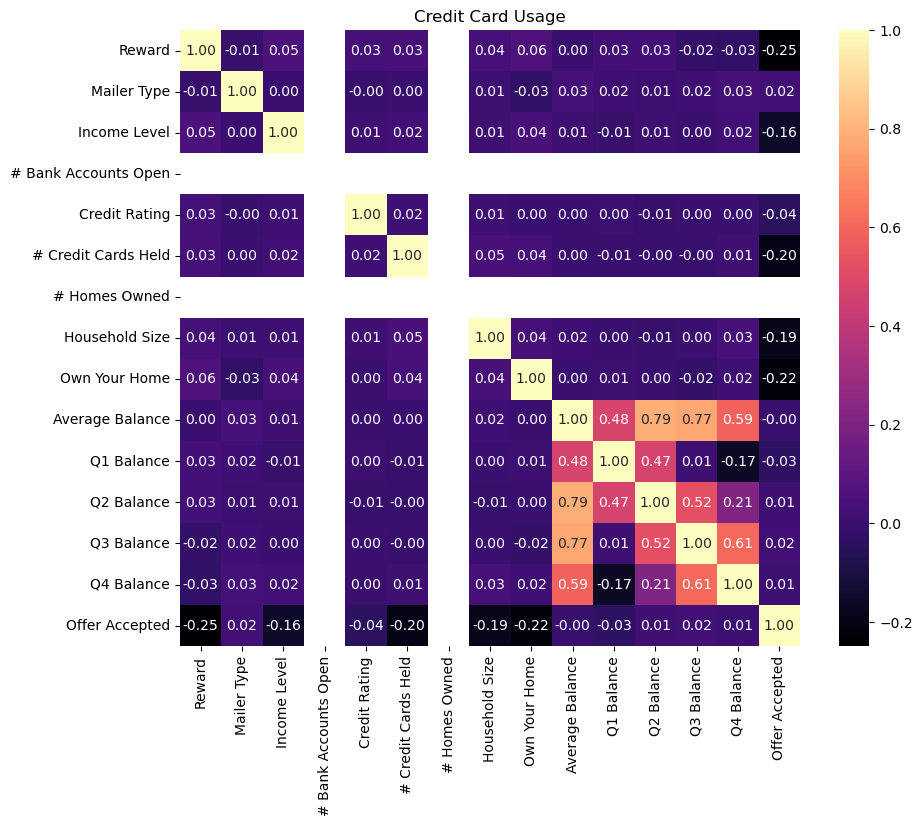

In [52]:
corr=df3.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='magma') 
plt.title("Credit Card Usage")

# Feature Selection

In [54]:
x = df3.drop(columns = ['Offer Accepted'])
y = df3['Offer Accepted']

In [55]:
sk = SelectKBest(score_func=f_classif,k=10)

In [56]:
x_new = sk.fit_transform(x,y)

In [57]:
selected_features = x.columns[sk.get_support()]

In [58]:
feature_score = pd.DataFrame({'Feature':x.columns,'score':sk.scores_}).sort_values(by='score',ascending =False)

In [59]:
print(selected_features )
print("/nfeature scores:")
print(feature_score)

Index(['Reward', 'Mailer Type', 'Income Level', 'Credit Rating',
       '# Credit Cards Held', 'Household Size', 'Own Your Home', 'Q1 Balance',
       'Q2 Balance', 'Q3 Balance'],
      dtype='object')
/nfeature scores:
                 Feature        score
0                 Reward  2249.910717
8          Own Your Home  1691.433585
5    # Credit Cards Held  1382.323742
7         Household Size  1276.739328
2           Income Level   841.967966
4          Credit Rating    59.616472
10            Q1 Balance    40.518680
1            Mailer Type    15.195787
12            Q3 Balance    13.478824
11            Q2 Balance     5.536873
13            Q4 Balance     0.919199
9        Average Balance     0.063069
3   # Bank Accounts Open          NaN
6          # Homes Owned          NaN


In [60]:
x_selected = x[selected_features]

In [61]:
x_selected.head()

,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size,Own Your Home,Q1 Balance,Q2 Balance,Q3 Balance
0,-1.078558,-1.013642,-1.462395,-1.422234,0.537014,0.725277,-1.081035,1.167273,-0.273137,0.165080
1,-1.078558,-1.013642,1.140906,1.480319,0.537014,1.631282,0.925040,-1.973227,-1.973281,-2.079615
2,-1.078558,0.986541,-1.462395,1.480319,0.537014,-1.367064,0.925040,-0.747175,-1.425879,-1.850952
3,-1.078558,-1.013642,1.140906,-1.422234,-1.112234,0.725277,-1.081035,1.070320,1.645789,0.205684
4,-1.078558,-1.013642,1.140906,1.480319,0.537014,2.059563,0.925040,1.628337,0.772130,-0.029880


# Scalling

In [63]:
scaler= StandardScaler()

In [64]:
x_scaled=scaler.fit_transform(x_selected)

In [65]:
x_scaled

array([[-1.07855839, -1.01364239, -1.46239549, ...,  1.16727263,
        -0.27313745,  0.16507983],
       [-1.07855839, -1.01364239,  1.1409059 , ..., -1.97322662,
        -1.97328145, -2.07961518],
       [-1.07855839,  0.98654122, -1.46239549, ..., -0.74717502,
        -1.42587923, -1.85095207],
       ...,
       [-1.07855839,  0.98654122, -1.46239549, ...,  0.65937973,
        -0.92442088,  1.2575048 ],
       [-1.07855839, -1.01364239, -1.46239549, ...,  0.07396237,
        -0.04326677, -0.34871106],
       [-1.07855839, -1.01364239, -0.17885651, ..., -1.23230161,
        -1.02473614,  0.52968465]])

# Train Test Split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [68]:
print(f"x_train:{x_train.shape}\nx_test:{x_test.shape}\ny_train:{y_train.shape}\ny_test:{y_test.shape}\n")

x_train:(27160, 10)
x_test:(6790, 10)
y_train:(27160,)
y_test:(6790,)



# Model Building

In [70]:
# Check Target Variable
if y.dtype == 'float' or y.dtype == 'int64':
    y = y.astype(int)
elif y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

print("✅ Target Variable Fixed:", np.unique(y))

# Check X and y Shape
print("X Shape:", x.shape)
print("y Shape:", y.shape)

# Check if Target Column is in X
if 'Offer Accepted' in x.columns:
    x.drop(columns=['Offer Accepted'], inplace=True)
    print("✅ Target Column Dropped from X")

# Final Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("✅ Final Shapes - x_train:", x_train.shape, "y_train:", y_train.shape)


✅ Target Variable Fixed: [0 1]
X Shape: (33950, 14)
y Shape: (33950,)
✅ Final Shapes - x_train: (27160, 14) y_train: (27160,)


In [71]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [72]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name} --->")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy_score,
        'Report': classification_report(y_test, y_pred)
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report")
    print(results[name]['Report'])


Training Logistic Regression --->
Logistic Regression Accuracy: 0.6872

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3379
           1       0.69      0.69      0.69      3411

    accuracy                           0.69      6790
   macro avg       0.69      0.69      0.69      6790
weighted avg       0.69      0.69      0.69      6790


Training Random Forest --->
Random Forest Accuracy: 0.9242

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3379
           1       0.91      0.94      0.93      3411

    accuracy                           0.92      6790
   macro avg       0.92      0.92      0.92      6790
weighted avg       0.92      0.92      0.92      6790


Training Decision Tree --->
Decision Tree Accuracy: 0.8676

Classification Report
              precision    recall  f1-score   support

           0       0.89      0

# Hyperparameter Tuning

In [74]:
rfc = RandomForestClassifier(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [75]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [76]:
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,  
    scoring=['accuracy', 'f1', 'roc_auc'],  # Use multiple metrics
    refit='f1',  # Choose best model based on F1-score
    n_jobs=-1, 
    verbose=2   
)

In [77]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             refit='f1', scoring=['accuracy', 'f1', 'roc_auc'], verbose=2)

In [78]:
print("Best Parameters:", grid_search.best_params_)
print(f"Best {grid_search.refit} Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best f1 Score: 0.9199861602863544


In [79]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:

best_model = RandomForestClassifier(
    max_features='sqrt',
    n_estimators=300,
    n_jobs=-1,
    random_state=42
)

In [81]:
best_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [82]:
y_pred = best_model.predict(x_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.9248895434462445
F1 Score: 0.9264281592613964


In [157]:
import joblib

In [159]:
joblib.dump(best_model,"Creditcard Marketing.joblib")

['Creditcard Marketing.joblib']

In [161]:
load_model= joblib.load("Creditcard Marketing.joblib")

# Pipeline

In [296]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [302]:
categorical_cols = ['Reward', 'Mailer Type', 'Income Level', 'Credit Rating', 'Own Your Home']
numerical_cols = ['# Credit Cards Held', 'Household Size', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance']

# 2️⃣ Create transformers
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numbers
    ('scaler', StandardScaler()) # Scale numerical data

])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categories
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # Encode categories
])

# 3️⃣ Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

# 4️⃣ Create pipeline with classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [304]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['# Credit Cards Held',
                                                   'Household Size',
                                                   'Q1 Balance', 'Q2 Balance',
                                                   'Q3 Balance']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Reward', 'Mailer Type',
                                                   'Income Level',
                                                   'Credit Rating',
                                                   'Own Your Home'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [306]:
joblib.dump(pipeline,'RFC_pipeline.joblib')

['RFC_pipeline.joblib']

In [308]:
loaded_pipeline=joblib.load('RFC_pipeline.joblib')

In [310]:
df_unseen=pd.read_csv('Unseen1.csv')

In [312]:
df_unseen.head()

,Offer Accepted,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size,Own Your Home,Q1 Balance,Q2 Balance,Q3 Balance
0,No,Air Miles,Letter,High,High,2,4,No,1669,877,1095
1,No,Air Miles,Letter,Medium,Medium,2,5,Yes,39,106,78
2,No,Air Miles,Postcard,High,Medium,2,2,Yes,367,352,145
3,No,Air Miles,Letter,Medium,High,1,4,No,1578,1760,1119
4,No,Air Miles,Letter,Medium,Medium,2,6,Yes,2140,1357,982


In [314]:
x_unseen=df_unseen.drop('Offer Accepted',axis=1)
y_unseen=df_unseen['Offer Accepted']

In [316]:
y_predunseen=loaded_pipeline.predict(x_unseen)

In [318]:
df_unseen['y_predicted']=y_predunseen

In [322]:
df_unseen.head(20)

,Offer Accepted,Reward,Mailer Type,Income Level,Credit Rating,# Credit Cards Held,Household Size,Own Your Home,Q1 Balance,Q2 Balance,Q3 Balance,y_predicted
0,No,Air Miles,Letter,High,High,2,4,No,1669,877,1095,0
1,No,Air Miles,Letter,Medium,Medium,2,5,Yes,39,106,78,0
2,No,Air Miles,Postcard,High,Medium,2,2,Yes,367,352,145,0
3,No,Air Miles,Letter,Medium,High,1,4,No,1578,1760,1119,0
4,No,Air Miles,Letter,Medium,Medium,2,6,Yes,2140,1357,982,0
5,No,Air Miles,Letter,Medium,High,3,4,No,1847,1365,750,0
6,No,Air Miles,Letter,Medium,Medium,2,3,No,468,188,347,0
7,No,Cash Back,Postcard,Low,Medium,4,4,Yes,132,391,285,0
8,No,Air Miles,Postcard,Medium,Low,2,4,Yes,894,891,882,0
9,No,Air Miles,Letter,High,Low,3,4,Yes,1814,1454,514,0


In [324]:
joblib.dump(pipeline, 'Random_Forest_model.joblib')

['Random_Forest_model.joblib']